In [1]:
from tensorflow.keras.datasets import mnist

In [2]:
(train_input, train_target), (test_input, test_target) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [4]:
print(train_input.shape, train_target.shape)
print(test_input.shape, test_target.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


''

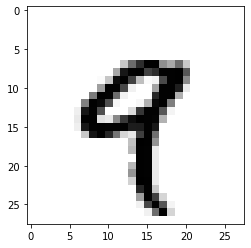

In [5]:
import matplotlib.pyplot as plt

digit = train_input[4]
plt.imshow(digit, cmap='gray_r')
;

In [6]:
train_input_2d = train_input.astype('float32').reshape(-1, 28 * 28) / 255
test_input_2d = test_input.astype('float32').reshape(-1, 28 * 28) / 255

In [13]:
from tensorflow.keras.utils import to_categorical

train_target_categorical = to_categorical(train_target)
test_target_categorical = to_categorical(test_target)

In [17]:
from tensorflow.keras import models
from tensorflow.keras.layers import Dense

model = models.Sequential()
model.add(Dense(512, activation='relu', input_shape=(28 * 28, )))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_input_2d, train_target_categorical, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 5s 12ms/step - loss: 0.4554 - accuracy: 0.8584 - val_loss: 0.1197 - val_accuracy: 0.9633
Epoch 2/10
375/375 [==============================] - 4s 11ms/step - loss: 0.0994 - accuracy: 0.9715 - val_loss: 0.1009 - val_accuracy: 0.9696
Epoch 3/10
375/375 [==============================] - 4s 12ms/step - loss: 0.0568 - accuracy: 0.9826 - val_loss: 0.0961 - val_accuracy: 0.9724
Epoch 4/10
375/375 [==============================] - 4s 12ms/step - loss: 0.0413 - accuracy: 0.9865 - val_loss: 0.1025 - val_accuracy: 0.9748
Epoch 5/10
375/375 [==============================] - 4s 12ms/step - loss: 0.0275 - accuracy: 0.9921 - val_loss: 0.1150 - val_accuracy: 0.9697
Epoch 6/10
375/375 [==============================] - 4s 12ms/step - loss: 0.0235 - accuracy: 0.9927 - val_loss: 0.1088 - val_accuracy: 0.9760
Epoch 7/10
375/375 [==============================] - 4s 12ms/step - loss: 0.0172 - accuracy: 0.9941 - val_loss: 0.1337 - val_accuracy: 0.9728

In [20]:
test_loss, test_acc = model.evaluate(test_input_2d, test_target_categorical)
print(test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.1004 - accuracy: 0.9818
0.9818000197410583
